# Project Milestone 2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gzip
import os 

---
## Importing datasets


In [2]:
current_dir = os.getcwd()
parent_folder_path = os.path.abspath(os.path.join(current_dir, ".."))
data_path = os.path.join(parent_folder_path, "data")

path_ba = data_path + '/BeerAdvocate'
path_rb = data_path + '/RateBeer'

beers_ba = pd.read_csv(f"{path_ba}/{'beers.csv'}")
users_ba = pd.read_csv(f"{path_ba}/{'users.csv'}")
breweries_ba = pd.read_csv(f"{path_ba}/{'breweries.csv'}")  
beers_rb = pd.read_csv(f"{path_rb}/{'beers.csv'}")
users_rb = pd.read_csv(f"{path_rb}/{'users.csv'}")
breweries_rb = pd.read_csv(f"{path_rb}/{'breweries.csv'}")  


In [10]:
def import_gz(path):
    try:
        # Open compressed file
        with gzip.open(path, 'rt') as file:
            data = file.read()

        # We divide the whole file into different posts (discriminate thanks to empty lines)
        posts = data.split('\n\n')

        # Create a list to store entries for each post
        data_list = []

        for post in posts.items():
            # Split each post by line
            lines = post.split('\n')
            post_entry = {}

            for line in lines.items():
                key, value = line.split(': ')
                post_entry[key] = value

            data_list.append(post_entry)

        # Create a DataFrame from the list of dictionaries
        df = pd.DataFrame(data_list)

        # Convert numeric columns to numeric values
        numeric_columns = ['beer_id', 'brewery_id', 'abv', 'date', 'appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']
        df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

        # Convert 'review' column to boolean values
        df['review'] = df['review'] == 'True'

        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        return None



In [11]:
ratings_adv = import_gz(f"{path_ba}/{'ratings.txt.gz'}")

In [3]:
#deep copies of all dataframes 
beers_ba_f = beers_ba.copy(deep=True)
users_ba_f = users_ba.copy(deep=True)
breweries_ba_f = breweries_ba.copy(deep=True)

beers_rb_f = beers_rb.copy(deep=True)
users_rb_f = users_rb.copy(deep=True)
breweries_rb_f = breweries_rb.copy(deep=True)

# 1. beers.csv file study 

In [4]:
beers_ba_f.shape

(280823, 15)

In [5]:
beers_rb_f.shape

(442081, 14)

In [6]:
beers_rb_f.columns

#14 columns. rb has different columns: 'overall_score', 'style_score'

Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'overall_score', 'style_score', 'avg', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')

In [7]:
beers_ba_f.columns

#15 columns. ba has different colums: 'nbr_reviews', 'ba_score', 'bros_score'
#overall_score == ba_score

Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')

In [8]:
beers_rb_f.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN


In [9]:
beers_ba_f.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


In [10]:
beers_ba_f.isna().sum()

beer_id                           0
beer_name                         0
brewery_id                        0
brewery_name                      0
style                             0
nbr_ratings                       0
nbr_reviews                       0
avg                           32829
ba_score                     219623
bros_score                   275121
abv                           36024
avg_computed                  32841
zscore                       240538
nbr_matched_valid_ratings         0
avg_matched_valid_ratings    252551
dtype: int64

In [11]:
beers_rb_f.isna().sum()

# overall there are more missing values in rb 

beer_id                           0
beer_name                         0
brewery_id                        0
brewery_name                      0
style                             0
nbr_ratings                       0
overall_score                338053
style_score                  338013
avg                           46424
abv                           42094
avg_computed                  45391
zscore                       399853
nbr_matched_valid_ratings         0
avg_matched_valid_ratings    399853
dtype: int64

## Number of ratings 

In [12]:
print('Number of ratings in RateBeer: ', beers_rb_f['nbr_ratings'].sum())
print('Number of ratings in BeerAdvocate: ', beers_ba_f['nbr_ratings'].sum())

# more ratings in BeerAdvovcate

Number of ratings in RateBeer:  7122074
Number of ratings in BeerAdvocate:  8393032


In [13]:
beers_ba_f['nbr_ratings'].describe()

# ca note plus sur ba

count    280823.000000
mean         29.887267
std         231.010063
min           0.000000
25%           1.000000
50%           2.000000
75%           8.000000
max       16509.000000
Name: nbr_ratings, dtype: float64

In [14]:
beers_rb_f['nbr_ratings'].describe()

count    442081.000000
mean         16.110337
std          80.988812
min           0.000000
25%           1.000000
50%           3.000000
75%           9.000000
max        5272.000000
Name: nbr_ratings, dtype: float64

## Style of beers

In [15]:
print('Number of style of beers in BeerAdvocate: ', len(beers_ba_f['style'].unique()))
print('Number of style of beers in RateBeer: ', len(beers_rb_f['style'].unique()))

# more style in BeerAdvocate 

nbr_style_ba = beers_ba_f['style'].value_counts()
nbr_style_rb = beers_rb_f['style'].value_counts()

Number of style of beers in BeerAdvocate:  104
Number of style of beers in RateBeer:  94


In [16]:
nbr_style_ba.head(10)

# most represented style in BA is American IPA, American Pale Ale, Saison - Farmhouse Ale

style
American IPA                        30433
American Pale Ale (APA)             17419
Saison / Farmhouse Ale              14006
American Double / Imperial IPA      12279
American Porter                      9377
American Wild Ale                    8994
American Amber / Red Ale             8830
American Double / Imperial Stout     7648
American Stout                       7430
Fruit / Vegetable Beer               6263
Name: count, dtype: int64

In [17]:
nbr_style_rb.head(10)

# most represented style in RB is Indian Pale Ale, American Pale Ale, Golden Ale/Blond Ale

style
India Pale Ale (IPA)    39898
American Pale Ale       25532
Golden Ale/Blond Ale    20514
Saison                  16012
Bitter                  14329
Spice/Herb/Vegetable    14047
Porter                  14019
Imperial IPA            13913
Stout                   13762
Imperial Stout          12913
Name: count, dtype: int64

## Scores 

/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

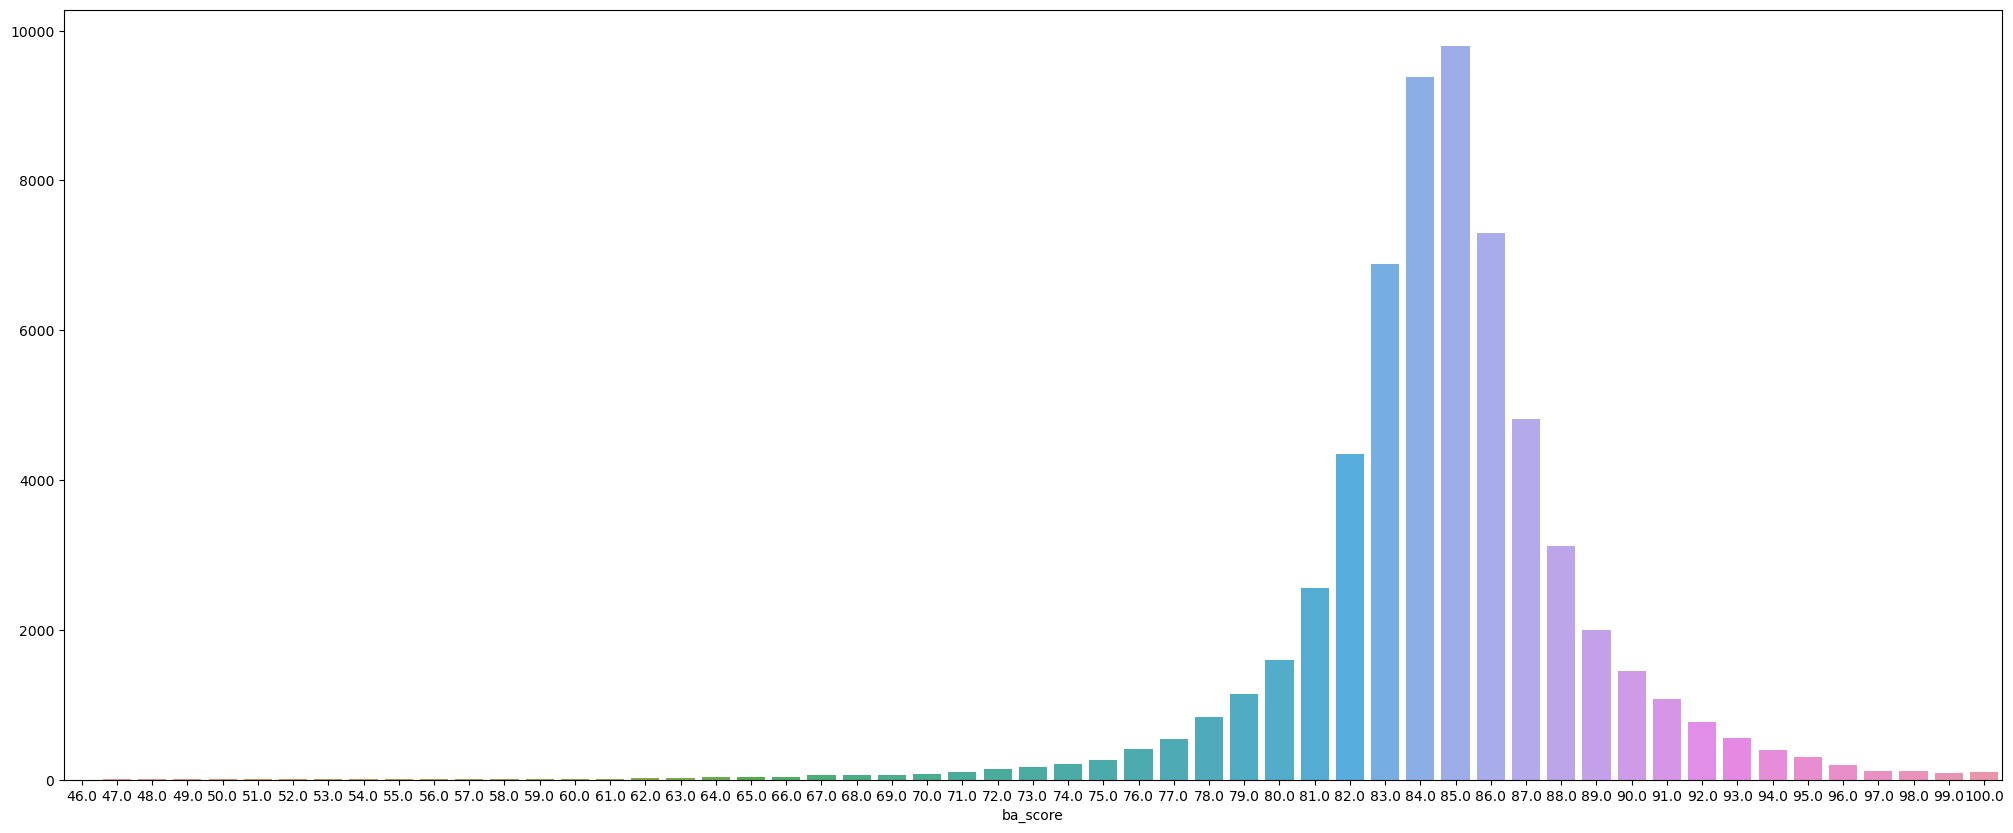

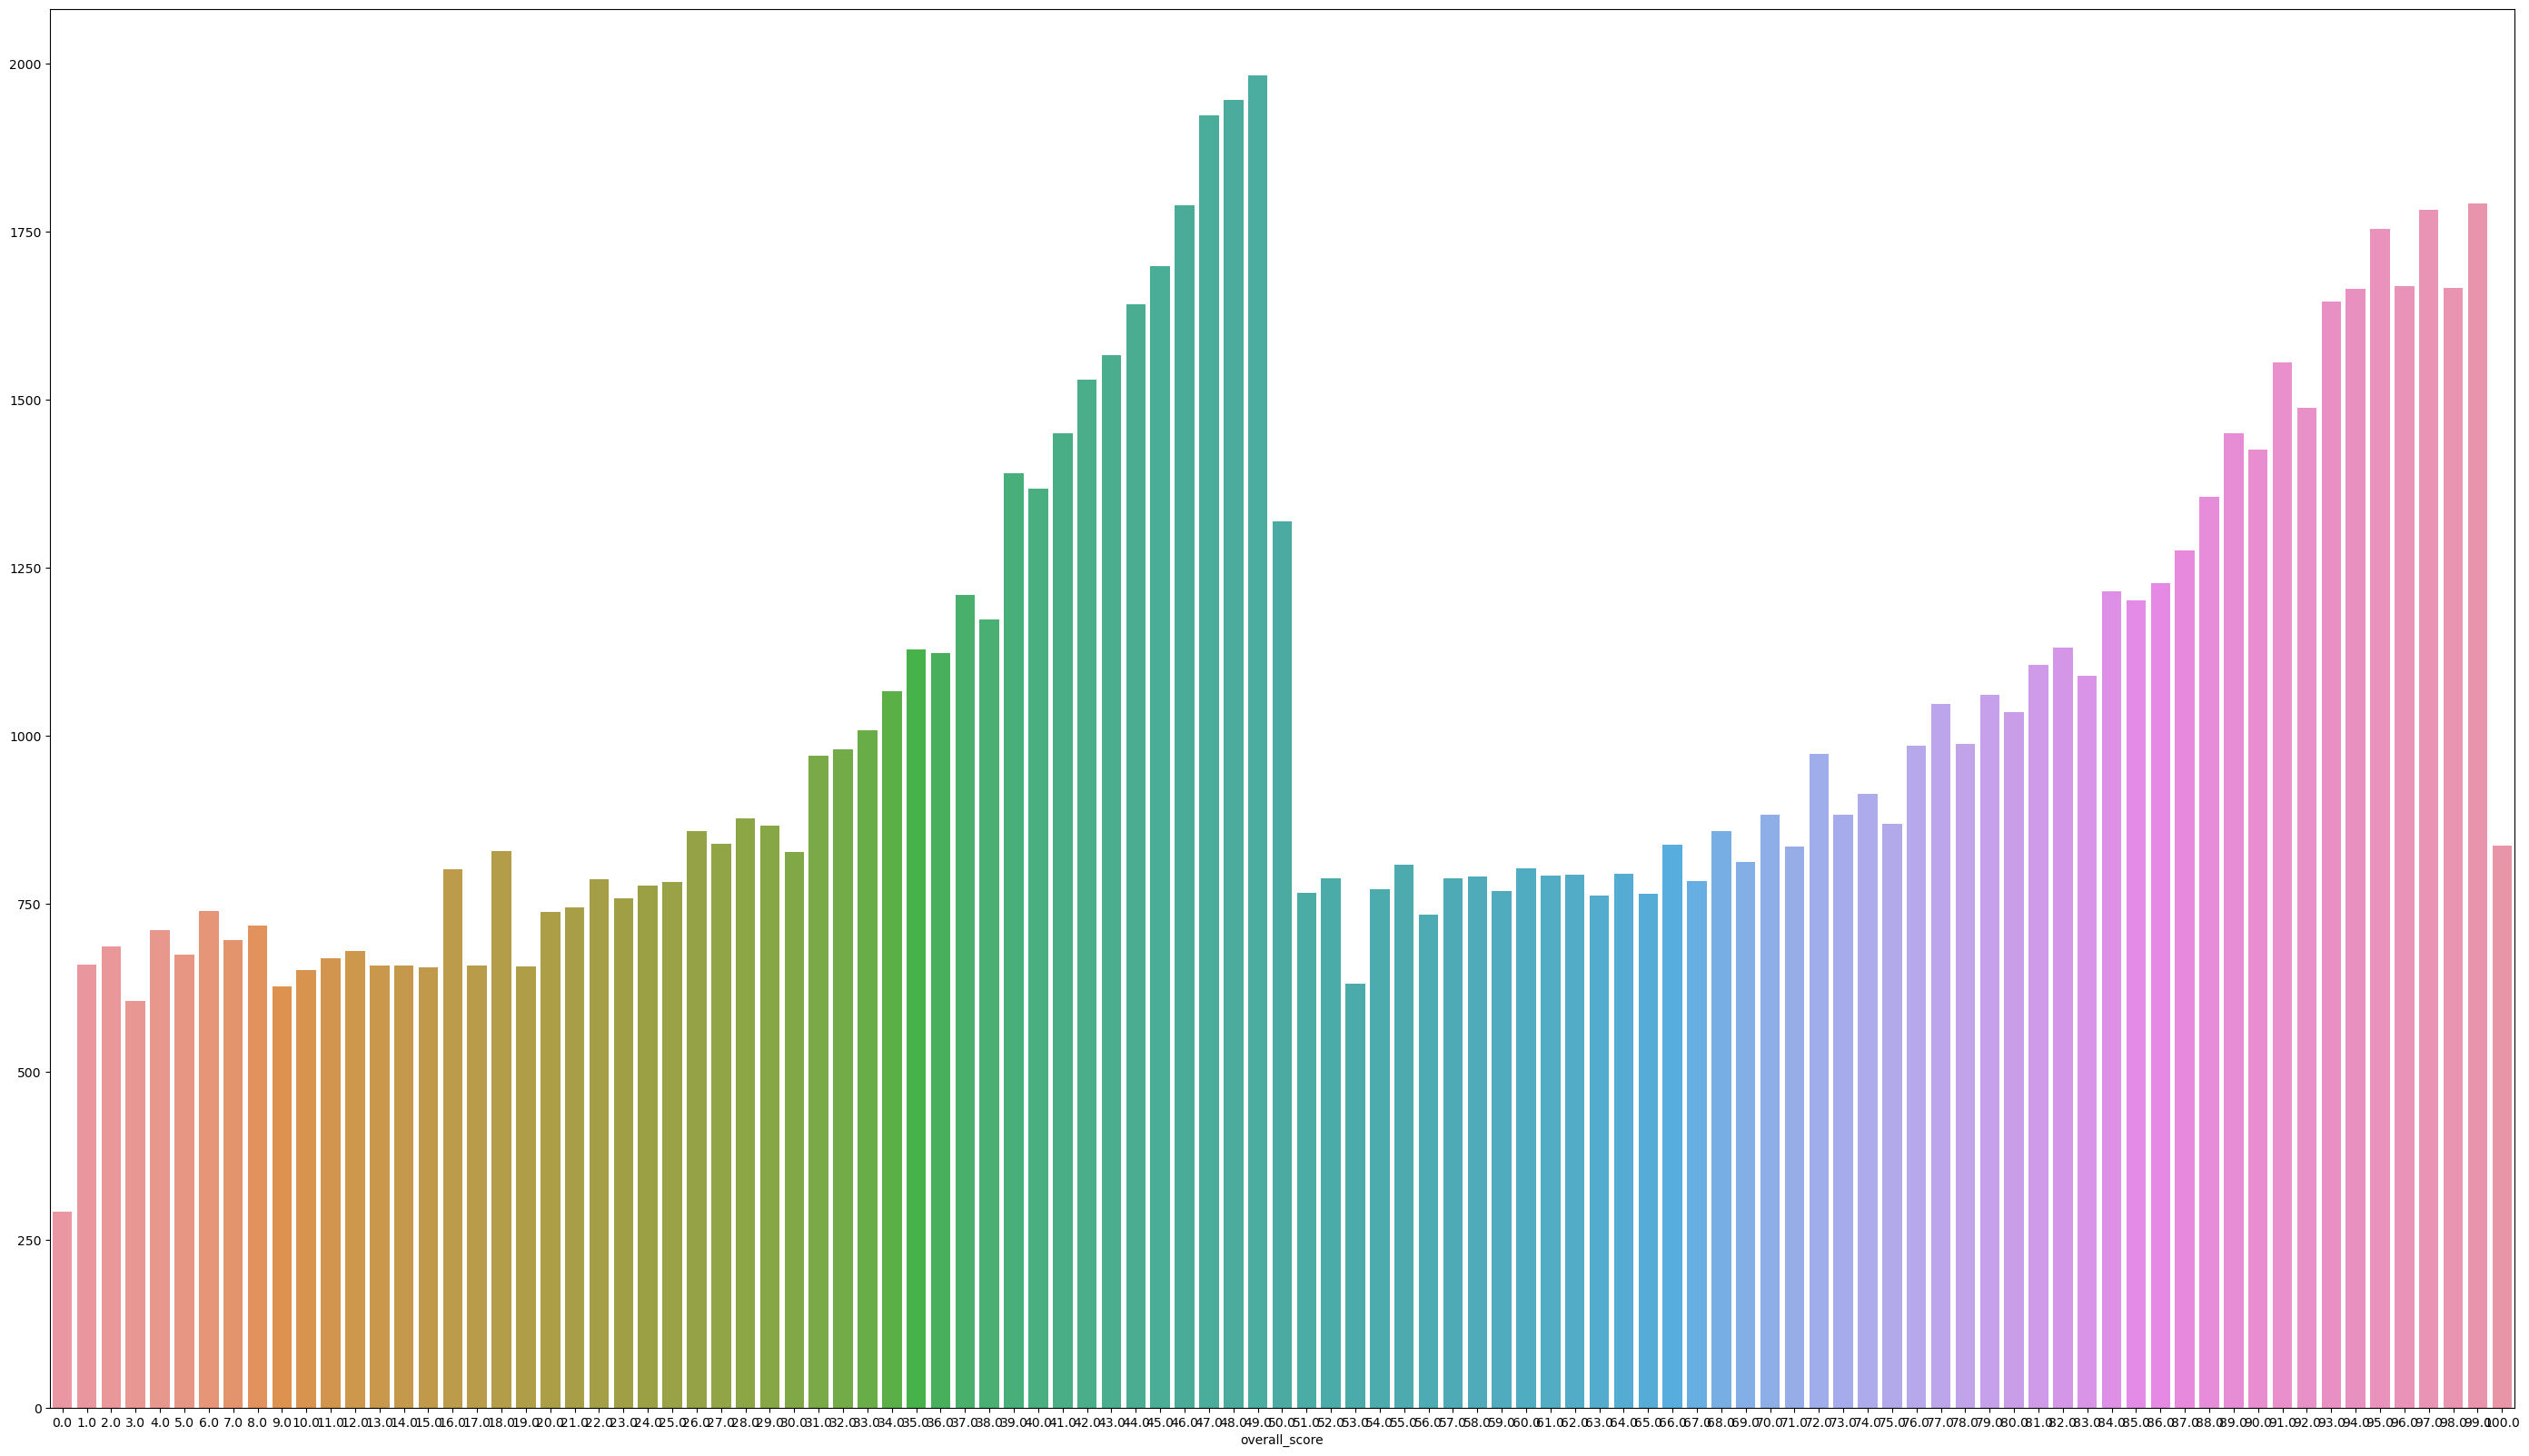

In [21]:
ba_score_count = beers_ba_f['ba_score'].value_counts()
rb_score_count = beers_rb_f['overall_score'].value_counts()

plt.figure(figsize=(25, 10))
ax1 = sns.barplot(x=ba_score_count.index, y=ba_score_count.values)

plt.figure(figsize=(35, 20))
ax2 = sns.barplot(x=rb_score_count.index, y=rb_score_count.values)

# ba_score peut être approximé par une gaussienne 
# score de rb bcp plus diffus 

In [ ]:
beers_ba_f['ba_score'].describe()

In [ ]:
beers_rb_f['overall_score'].describe()

# mean bcp plus grande pour ba, min quasi à 50 
# données de rb large std, min à 0

## Alcohol by volume 

In [22]:
beers_ba_f['abv'].describe()

count    244799.000000
mean          6.491370
std           2.054071
min           0.010000
25%           5.000000
50%           6.000000
75%           7.500000
max          67.500000
Name: abv, dtype: float64

In [23]:
beers_rb_f['abv'].describe()

# degree d'alcohol moyen a peu près pareil pour les deux sites

count    399987.000000
mean          6.065485
std           1.922965
min           0.010000
25%           4.800000
50%           5.600000
75%           7.000000
max         100.000000
Name: abv, dtype: float64

/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


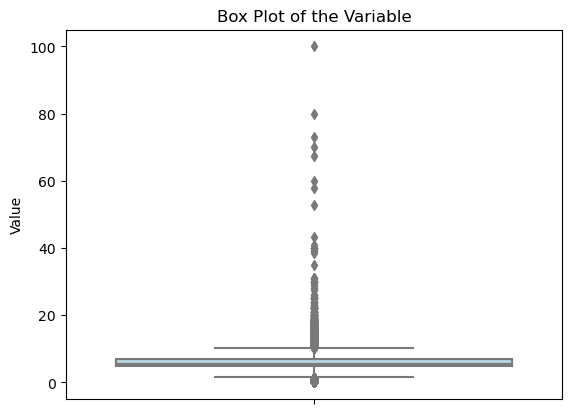

In [24]:
sns.boxplot(y=beers_rb_f['abv'], color='lightblue')
plt.title('Box Plot of the Variable')
plt.ylabel('Value')
plt.show()

/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


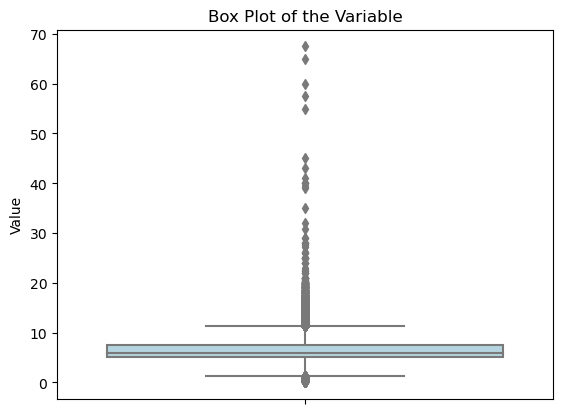

In [25]:
sns.boxplot(y=beers_ba_f['abv'], color='lightblue')
plt.title('Box Plot of the Variable')
plt.ylabel('Value')
plt.show()

# chelou y a des degrés bcp bcp bcp trop haut 

## Ratings per style of beer 

/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


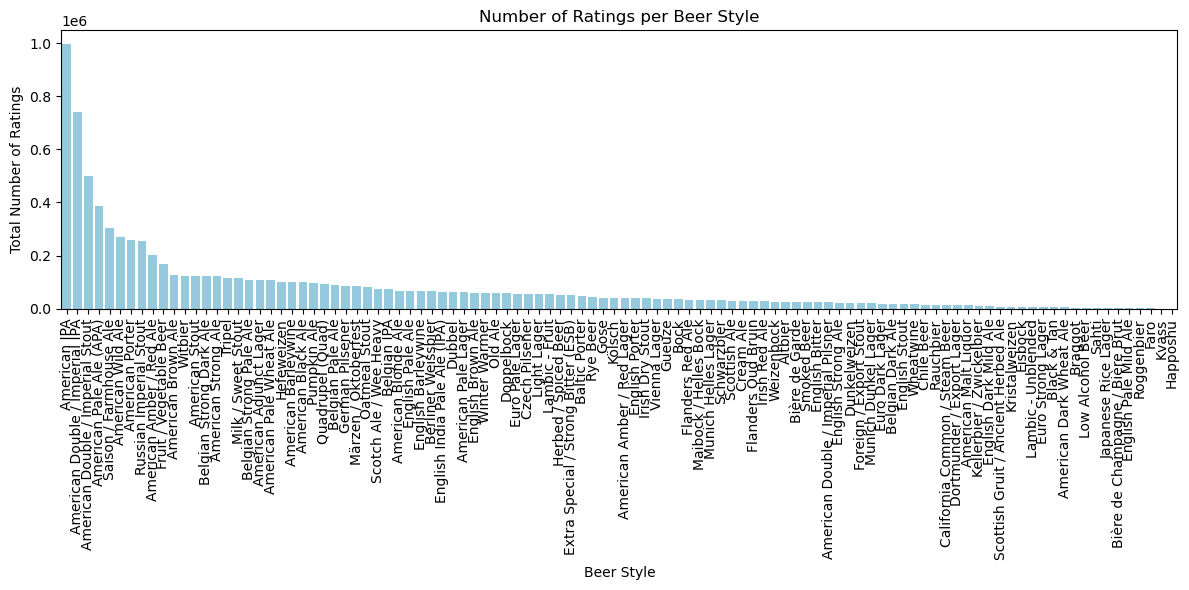

In [26]:
ba_ratings_style = beers_ba_f[['style', 'nbr_ratings']].groupby('style').sum().reset_index()
ba_ratings_style.head()

# Sort the data by the sum of ratings in descending order 
ba_ratings_style = ba_ratings_style.sort_values(by='nbr_ratings', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=ba_ratings_style, x='style', y='nbr_ratings', color='skyblue')
plt.title('Number of Ratings per Beer Style')
plt.xlabel('Beer Style')
plt.ylabel('Total Number of Ratings')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

# American IPA, American Double/Imperial IPA, American Double/Imperial Stout are the styles that received the highest number of ratings in ba

/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


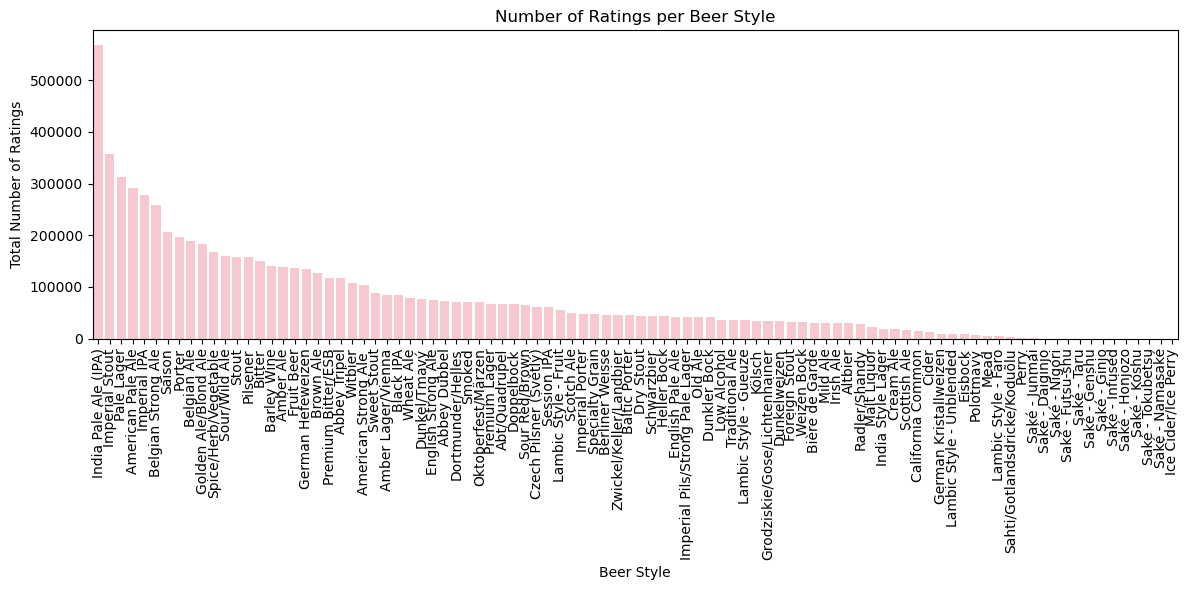

In [27]:
rb_ratings_style = beers_rb_f[['style', 'nbr_ratings']].groupby('style').sum().reset_index()
rb_ratings_style.head()

# Sort the data by the sum of ratings in descending order 
rb_ratings_style = rb_ratings_style.sort_values(by='nbr_ratings', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=rb_ratings_style, x='style', y='nbr_ratings', color='pink')
plt.title('Number of Ratings per Beer Style')
plt.xlabel('Beer Style')
plt.ylabel('Total Number of Ratings')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

# India Pale Ale, Imperial Stout, Pale lager are the styles that received the highest number of ratings in rb 

# 2. breweries.csv file study 

In [28]:
breweries_ba_f.shape

(16758, 4)

In [29]:
breweries_rb_f.shape

(24189, 4)

In [30]:
breweries_ba_f.head()

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2


In [31]:
breweries_rb_f.head()

,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3
1,13538,Northern Ireland,Ards Brewing Co.,13
2,22304,Northern Ireland,Barrahooley Craft Brewery,4
3,22818,Northern Ireland,Boundary,66
4,24297,Northern Ireland,Brewbot Belfast,3


/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


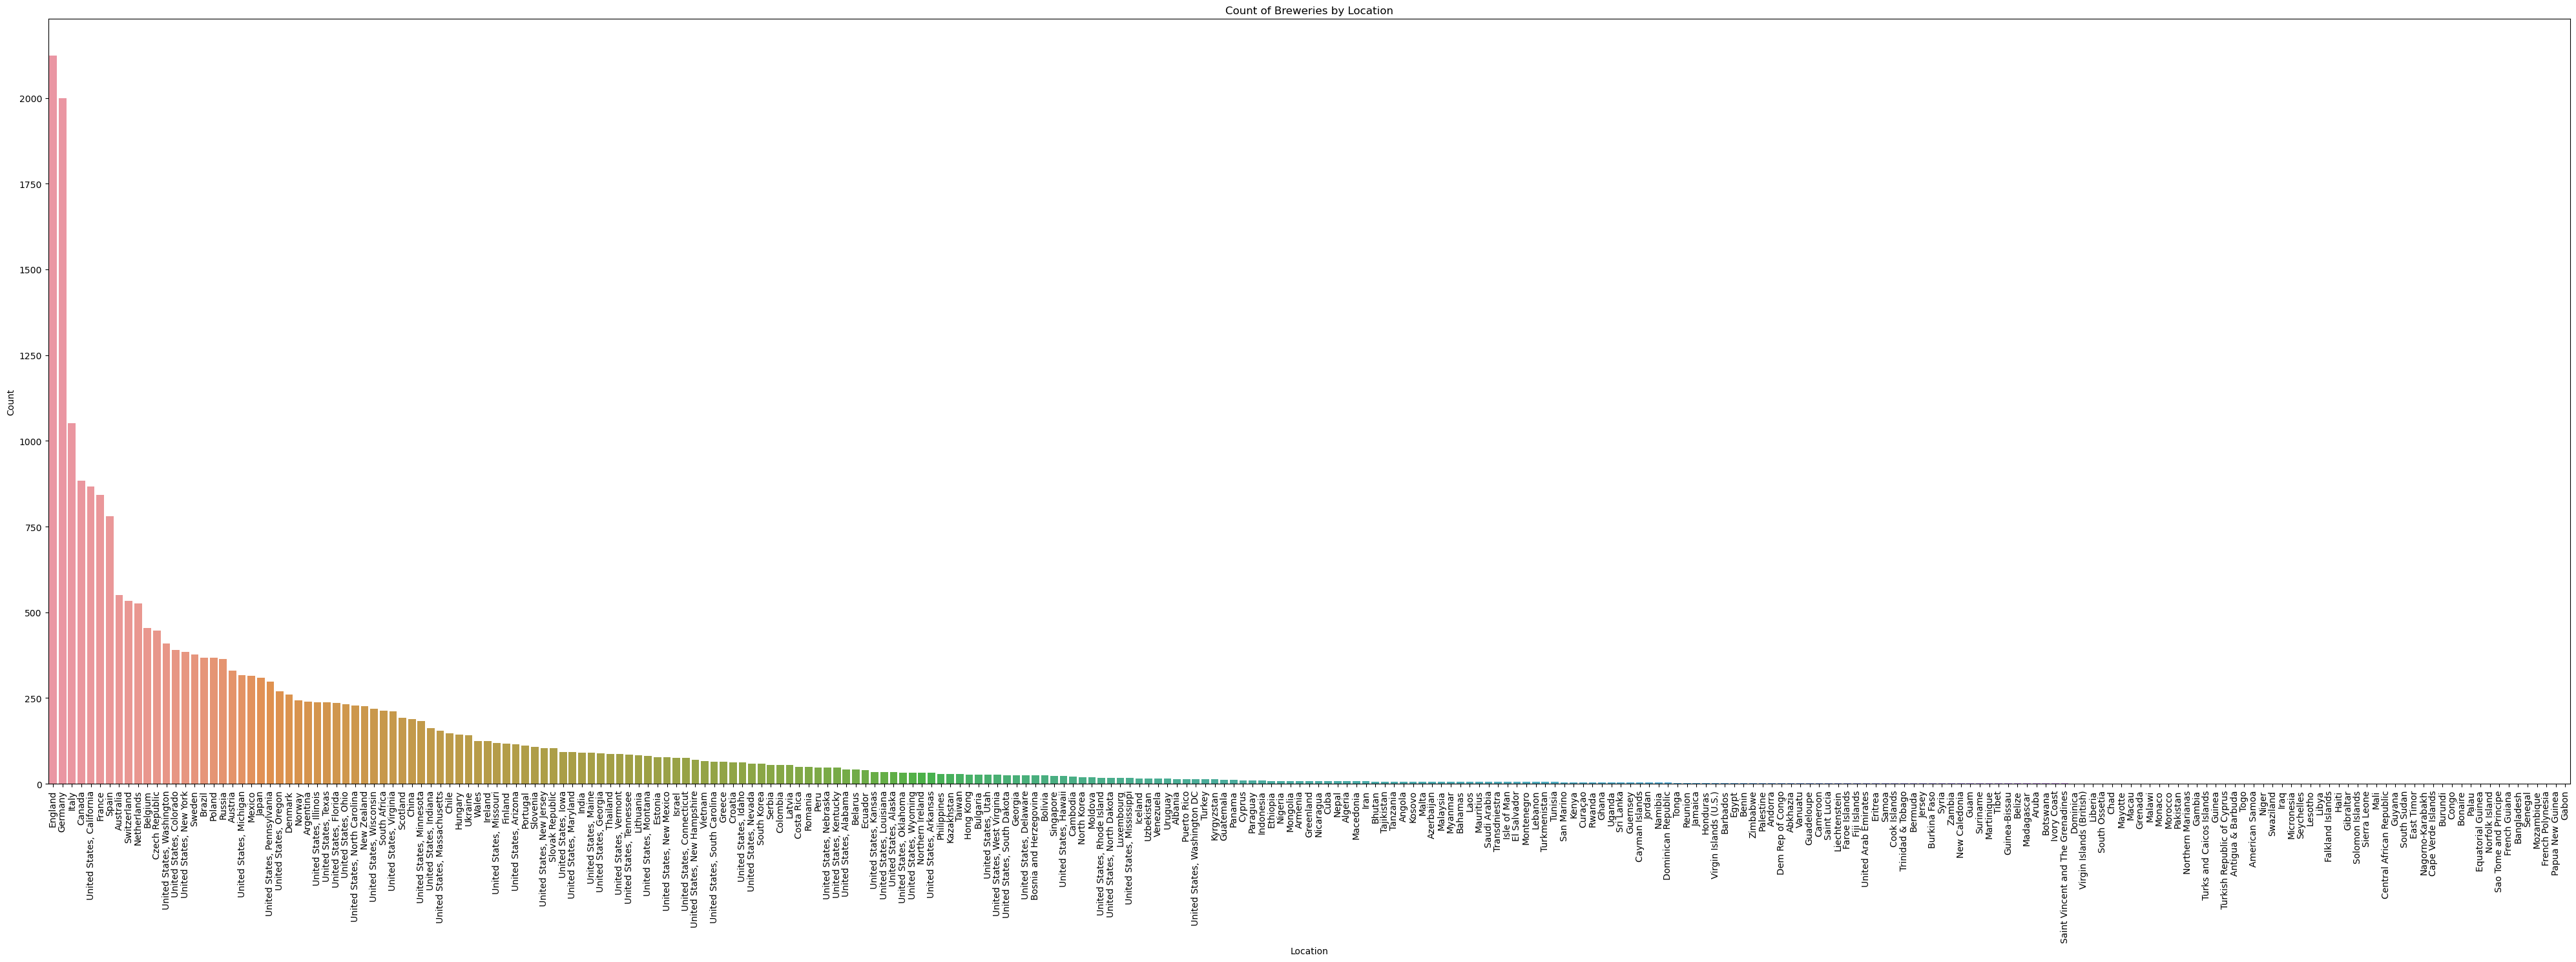

In [37]:
locations_rb = breweries_rb_f['location'].value_counts()
# 267 locations, but united states separated in states 

plt.figure(figsize=(40, 15))
ax = sns.countplot(data=breweries_rb_f, x='location', order=locations_rb.index)
plt.title('Count of Breweries by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# England has the highest number of breweries 
# But if we group all the states af the united states it might be the first country with the highest number of breweries 
# need to normalize maybe with the population or the size of the country 


# 3. beers.csv and brewery.csv merge 

In [33]:
# merge beers and bbrewery to study the locations of each style of beer
ba_beer_brewery= pd.merge(beers_ba_f, breweries_ba_f, left_on=['brewery_id'], right_on=['id'])
ba_beer_brewery = ba_beer_brewery.drop(columns=['beer_id','beer_name', 'avg_computed', 'zscore', 'nbr_matched_valid_ratings', 'avg_matched_valid_ratings', 'nbr_beers'])

/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

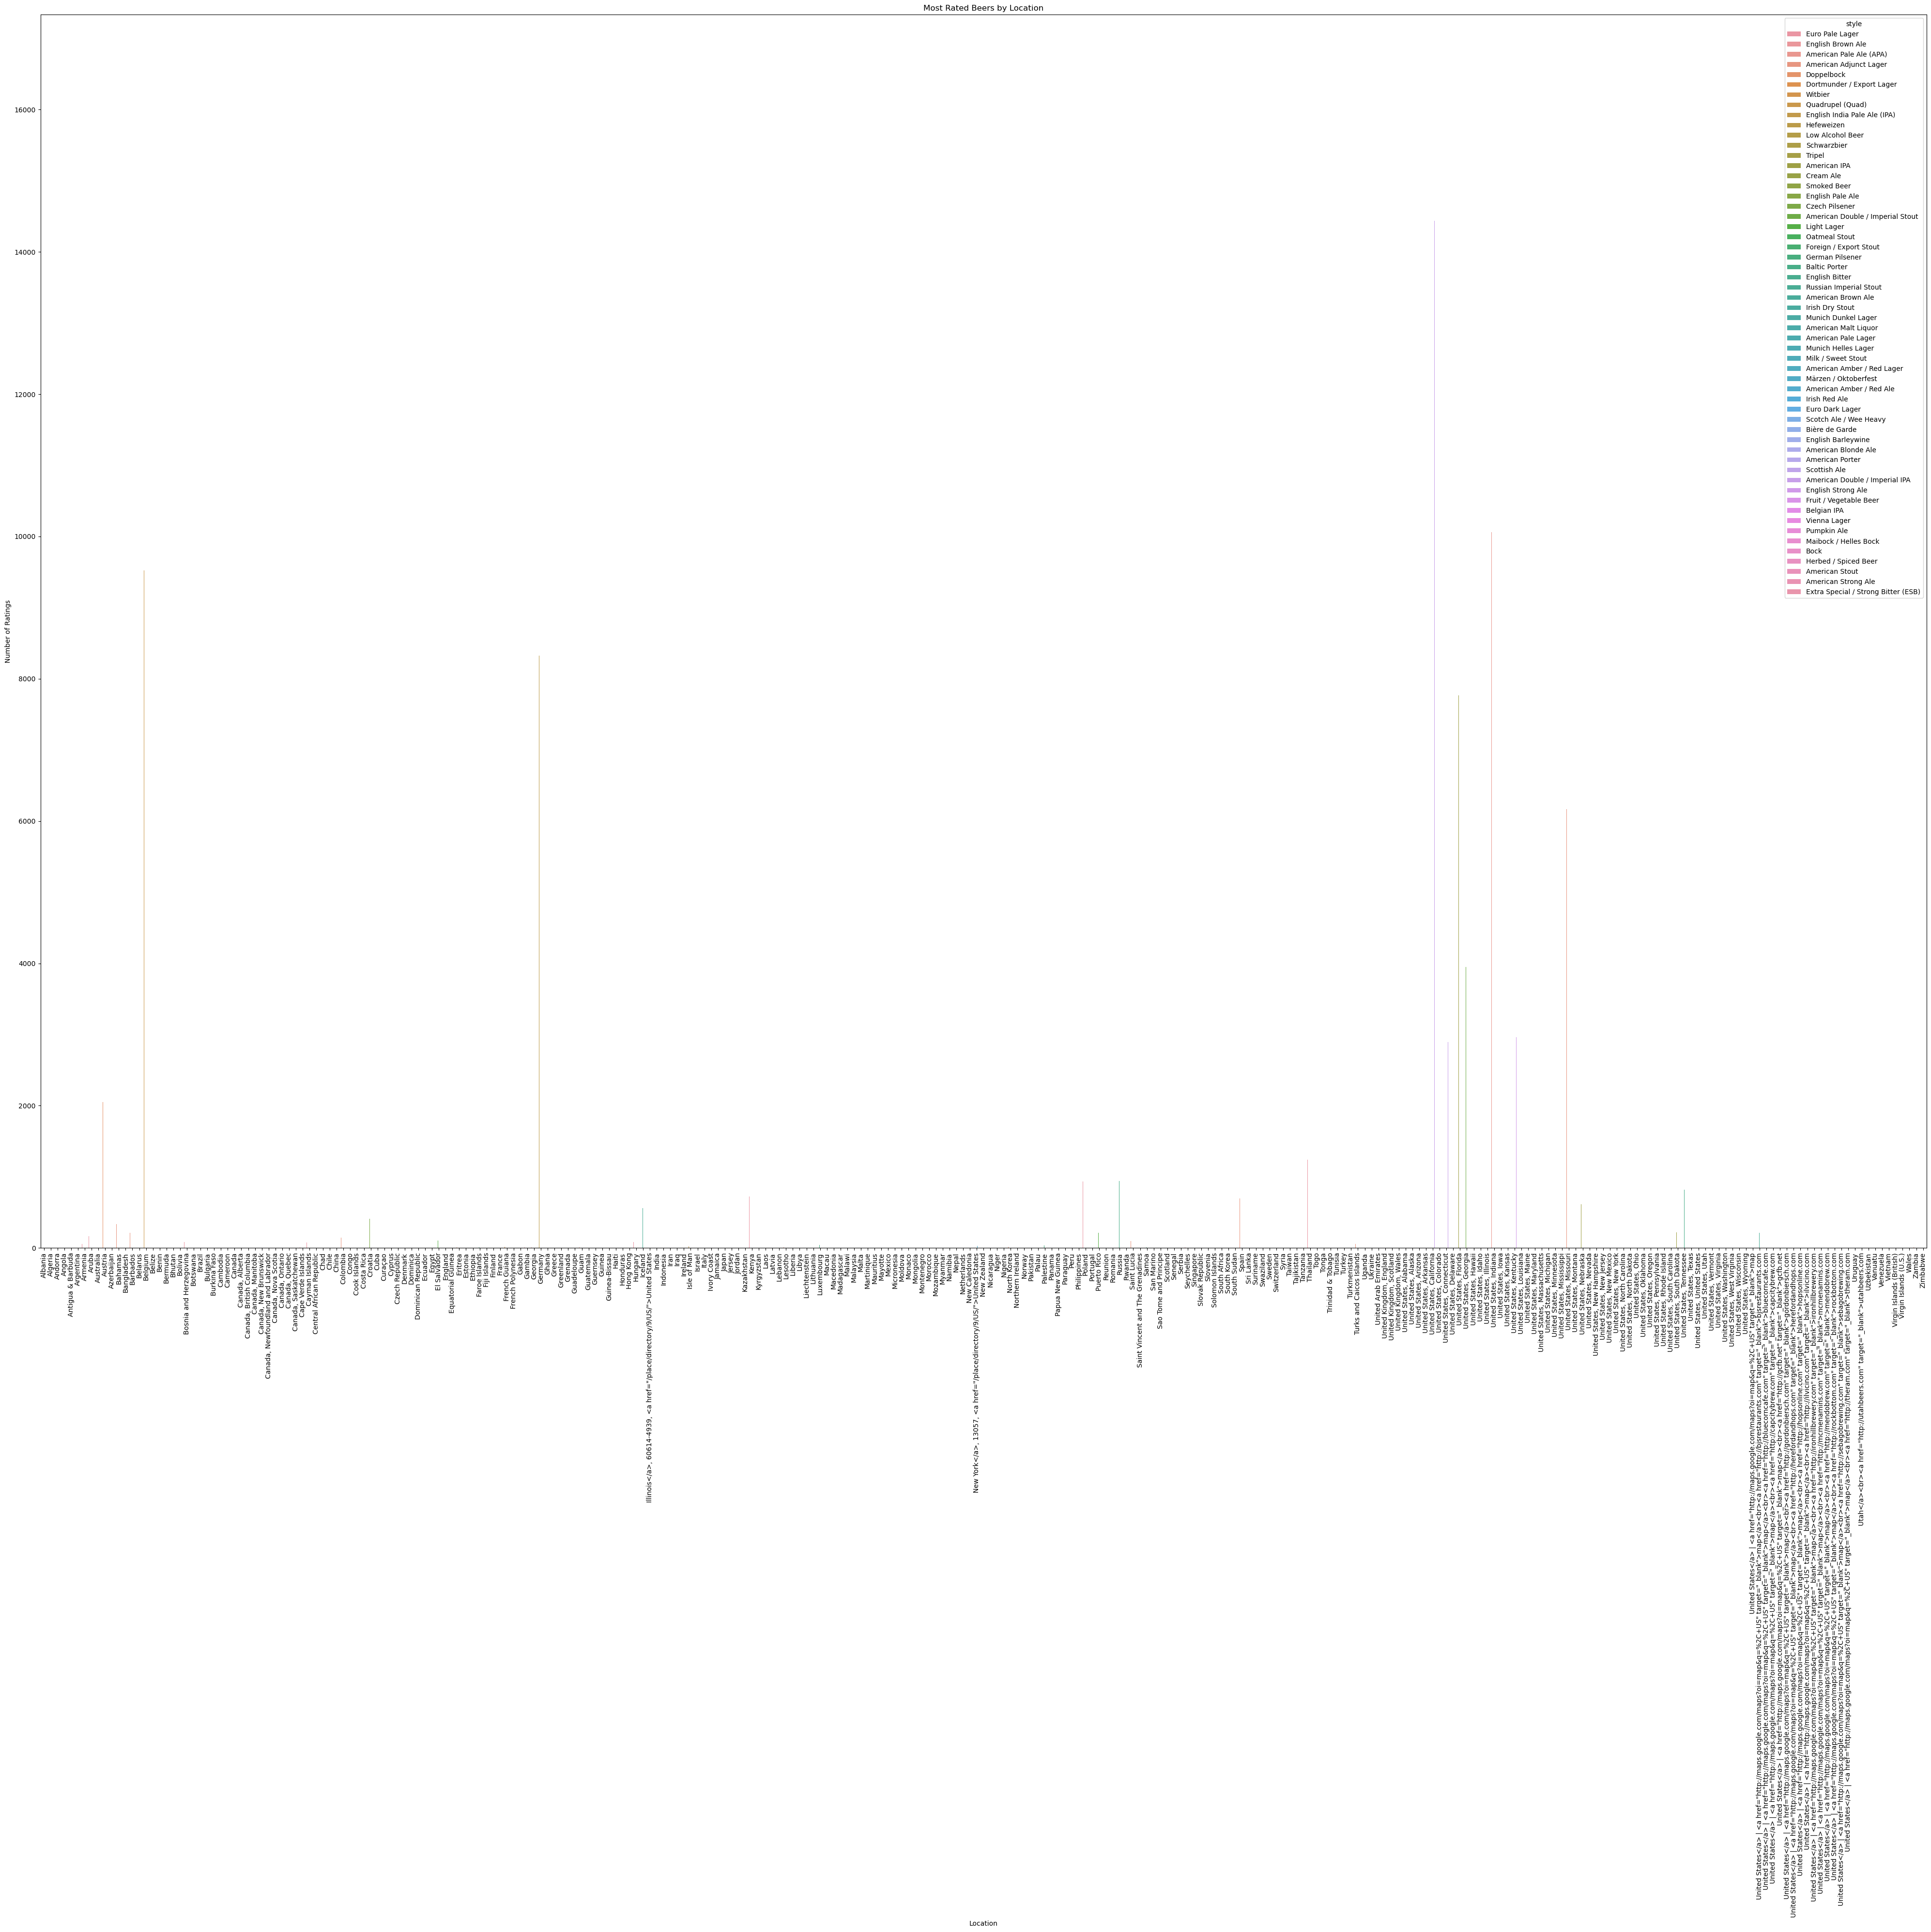

In [34]:
# Sort the DataFrame to find the highest-rated beer in each location
ba_highest_rated_per_location = ba_beer_brewery.groupby('location').apply(lambda x: x.nlargest(1, 'nbr_ratings'))

# Create a bar plot to visualize the most rated beers by location
plt.figure(figsize=(40, 40))
ax = sns.barplot(data=ba_highest_rated_per_location, x='location', y='nbr_ratings', hue='style')
plt.title('Most Rated Beers by Location')
plt.xlabel('Location')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# most rated beers are from United states and more specifically from California. Belgium is also quite high up there 